# DS-GA 1019

# Lab 12: OpenCL on GPU 
## Apr. 21, 2023

<img align="right"  src="images/im1.png" alt="Drawing" style="width: 500px;"/>

<div style="text-align: left"> 

Latency optimized: Optimized to compute operation in minimum time.
    
Throughput optimized: Optimized to compute many operations at the same time.
   
</div>


### Performance comparison

- Sequential code: CPU about 10x faster than GPU

- Parallel code: GPU can be 10x+ faster than CPU


- Latency:
    - CPU: Latency of operations is in nsec
    - GPU: Launching a kernel can take 10 us or more

## Cuda

A general purpose parallel computing platform and programming model


<img align="right"  src="images/cuda1.png" alt="Drawing" style="width: 500px;"/>

<div style="text-align: left"> 

    Grid: Group of blocks executing a kernel
    One grid per CUDA kernel
    
    Block: Group of threads that can be scheduled independently
    Max threads in a block: 1024
    
    Thread: A single context of execution
    
    Kernel: Function that will execute in parallel on multiple threads

</div>


<img src="images/cuda2.png" alt="Drawing" style="width: 700px;"/>

- One grid per CUDA kernel
- Multiple blocks per grid
- Multiple threads per block

<img align="right"  src="images/cuda3.png" alt="Drawing" style="width: 400px;"/>

<div style="text-align: left"> 

    CUDA Memory Hierarchy:
    
    Per thread local memory: Available only to the single thread
    
    Block shared memory: Shared by all the threads in a block
        Faster than global memory
    
    Global memory: Shared by all blocks and all grids

</div>


In [1]:
# Mac/Linux
# Launch a terminal shell and type the commands:
!export NUMBA_ENABLE_CUDASIM=1

# Windows
# Launch a CMD shell and type the commands:
# SET NUMBA_ENABLE_CUDASIM=1

In [2]:
%env NUMBA_ENABLE_CUDASIM=1

env: NUMBA_ENABLE_CUDASIM=1


In [3]:
from numba import cuda
print(cuda.gpus)

cuda.select_device(0)

<Managed Device 0>


In [4]:
from __future__ import division
from numba import cuda
import numpy
import math

# CUDA kernel
@cuda.jit
def inc_by_one(array):
    # get the thread, block
    tx = cuda.threadIdx.x       #which thread in the block
    bx = cuda.blockIdx.x        #which block in the grid
    bw = cuda.blockDim.x        #block dimension - number of threads per block
    
    index = tx + bx * bw
    
    if index > array.size:
        return
    
    array[index] += 1
    print("i, t, b, w:", index, tx, bx, bw)
        
        
# Host code   
data = numpy.ones(256)   # 256 is size of data
threadsperblock = 32     # 32 threads per block
blockspergrid = math.ceil(data.shape[0] / threadsperblock)  # 256/32=8 blocks per grid

inc_by_one[blockspergrid, threadsperblock](data)
print("\ndata:\n", data)

i, t, b, w: 0 0 0 32
i, t, b, w: 1 1 0 32
i, t, b, w: 2 2 0 32
i, t, b, w: 3 3 0 32
i, t, b, w: 4 4 0 32
i, t, b, w: 5 5 0 32
i, t, b, w: 6 6 0 32
i, t, b, w: 7 7 0 32
i, t, b, w: 8 8 0 32
i, t, b, w: 9 9 0 32
i, t, b, w: 10 10 0 32
i, t, b, w: 11 11 0 32
i, t, b, w: 12 12 0 32
i, t, b, w: 13 13 0 32
i, t, b, w: 14 14 0 32
i, t, b, w: 15 15 0 32
i, t, b, w: 16 16 0 32
i, t, b, w: 17 17 0 32
i, t, b, w: 18 18 0 32
i, t, b, w: 19 19 0 32
i, t, b, w: 20 20 0 32
i, t, b, w: 21 21 0 32
i, t, b, w: 22 22 0 32
i, t, b, w: 23 23 0 32
i, t, b, w: 24 24 0 32
i, t, b, w: 25 25 0 32
i, t, b, w: 26 26 0 32
i, t, b, w: 27 27 0 32
i, t, b, w: 28 28 0 32
i, t, b, w: 29 29 0 32
i, t, b, w: 30 30 0 32
i, t, b, w: 31 31 0 32
i, t, b, w: 32 0 1 32
i, t, b, w: 33 1 1 32
i, t, b, w: 34 2 1 32
i, t, b, w: 35 3 1 32
i, t, b, w: 36 4 1 32
i, t, b, w: 37 5 1 32
i, t, b, w: 38 6 1 32
i, t, b, w: 39 7 1 32
i, t, b, w: 40 8 1 32
i, t, b, w: 41 9 1 32
i, t, b, w: 42 10 1 32
i, t, b, w: 43 11 1 32
i, t, b, w: 44 12 

#### 1D grid of 1D blocks

```
bx = cuda.blockIdx.x
bw = cuda.blockDim.x
tx = cuda.threadIdx.x
i = tx + bx * bw
```

can be abbreviated to 

```
x = cuda.grid(1)
```

In [5]:
@cuda.jit
def inc_by_one(array):
    
    x = cuda.grid(1)
    if x > array.size:
        return
    
    array[x] += 1
    print("x:", x)
        
        
# Host code   
data = numpy.ones(256)
threadsperblock = 32
blockspergrid = math.ceil(data.shape[0] / threadsperblock)

inc_by_one[blockspergrid, threadsperblock](data)
print("\ndata:\n", data)

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
x: 44
x: 45
x: 46
x: 47
x: 48
x: 49
x: 50
x: 51
x: 52
x: 53
x: 54
x: 55
x: 56
x: 57
x: 58
x: 59
x: 60
x: 61
x: 62
x: 63
x: 64
x: 65
x: 66
x: 67
x: 68
x: 69
x: 70
x: 71
x: 72
x: 73
x: 74
x: 75
x: 76
x: 77
x: 78
x: 79
x: 80
x: 81
x: 82
x: 83
x: 84
x: 85
x: 86
x: 87
x: 88
x: 89
x: 90
x: 91
x: 92
x: 93
x: 94
x: 95
x: 96
x: 97
x: 98
x: 99
x: 100
x: 101
x: 102
x: 103
x: 104
x: 105
x: 106
x: 107
x: 108
x: 109
x: 110
x: 111
x: 112
x: 113
x: 114
x: 115
x: 116
x: 117
x: 118
x: 119
x: 120
x: 121
x: 122
x: 123
x: 124
x: 125
x: 126
x: 127
x: 128
x: 129
x: 130
x: 131
x: 132
x: 133
x: 134
x: 135
x: 136
x: 137
x: 138
x: 139
x: 140
x: 141
x: 142
x: 143
x: 144
x: 145
x: 146
x: 147
x: 148
x: 149
x: 150
x: 151
x: 152
x: 153
x: 154
x: 155
x: 156
x: 157
x: 1

### 2d version

In [6]:
@cuda.jit
def inc_2d(arr):
    """This kernel function will be executed by a thread."""
    i, j  = cuda.grid(2)

    if (i < arr.shape[0]) and (j < arr.shape[1]):
        arr[i, j] += 1


In [7]:
data = numpy.ones((64,64))


threadsperblock = (16,16)
blockspergrid_x = math.ceil(data.shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(data.shape[1] / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)


inc_2d[blockspergrid, threadsperblock](data)
print("\ndata:\n", data)


data:
 [[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


## OpenCL and pyOpenCL


In [8]:

# Use OpenCL To Add Two Random Arrays (This Way Hides Details)

import pyopencl as cl  # Import the OpenCL GPU computing API
import pyopencl.array as pycl_array  # Import PyOpenCL Array 
#(a Numpy array plus an OpenCL buffer object)

import numpy as np  # Import Numpy number tools

context = cl.create_some_context()  # Initialize the Context
# > specify what kind of gpu device to use
# > this step is not needed for cuda since it only use Nvidia gpu device

queue   = cl.CommandQueue(context)  # Instantiate a Queue
# > used to execute in specific order

# Create two random pyopencl arrays
a = pycl_array.to_device(queue, np.random.rand(50000).astype(np.float32))
b = pycl_array.to_device(queue, np.random.rand(50000).astype(np.float32))  
# > to_device move stuff to gpu


# Create an empty pyopencl destination array
res_c = pycl_array.empty_like(a)  

program = cl.Program(context, """
__kernel void sum(__global const float *a, __global const float *b, __global float *c)
{
  int i = get_global_id(0);
  c[i] = a[i] + b[i];
}""").build()  # Create the OpenCL program
# > build() is compiling

# Enqueue the program for execution and store the result in c
program.sum(queue, a.shape, None, a.data, b.data, res_c.data)  

print("a: {}".format(a))
print("b: {}".format(b))
print("c: {}".format(res_c))  
# Print all three arrays, to show sum() worked

a: [0.74944437 0.07604282 0.34693554 ... 0.06971314 0.6146328  0.24100396]
b: [0.16492367 0.64057714 0.19385502 ... 0.29503456 0.41755646 0.5703688 ]
c: [0.91436803 0.71661997 0.54079056 ... 0.3647477  1.0321892  0.81137276]


### Mandelbrot set

Set of complex numbers c for which $f_c(z) = z^2 + c$ doesn't diverge when iterated from z=0


There are two options for $f_c(z)$

1. Distance from 0 of sequence gets arbitrarily large
2. Distance is bounded (never larger than 2)  (Mandelbrot set)

Example: 

c = 1 

- $f_1(0) = 0^2 + 1 = 1$
- $f_1(1) = 1^2 + 1 = 2$
- $f_1(2) = 5$
- $f_1(5) = 26$

1 is not in mandelbrot set

Interesting Veritasium video about the Mandelbrot set - https://www.youtube.com/watch?v=ovJcsL7vyrk

In [9]:
import numpy as np
# color function for point at (x, y)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag > 4:
            return i
    return max_iters

def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color


In [10]:
import time
import matplotlib.pyplot as plt

img_width, img_height = 1000, 1000

gimage = np.zeros((img_width, img_height), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 0.5, -1.25, 1.25]).astype('float32')
iters = 80

start = time.time()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = time.time() - start

print ("Mandelbrot created on CPU in %f s" % dt)


Mandelbrot created on CPU in 6.445430 s


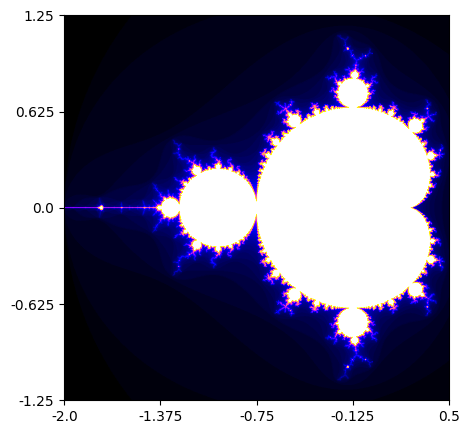

In [11]:
from matplotlib import colors

plt.figure(figsize=(5,5))
plt.imshow(gimage, cmap = 'gnuplot2')

plt.xticks(np.linspace(0, 1000, 5), np.linspace(xmin, xmax, 5))
plt.yticks(np.linspace(0, 1000, 5), np.linspace(ymax, ymin, 5))

plt.show()

In [12]:
import pyopencl as cl

ctx = cl.create_some_context(interactive=True)
devices = ctx.get_info(cl.context_info.DEVICES)
print(devices)

def mandelbrot_gpu(q, maxiter):

    global ctx
    
    queue = cl.CommandQueue(ctx)
    output = np.empty(q.shape, dtype=np.uint16)

    prg = cl.Program(ctx, """
    #pragma OPENCL EXTENSION cl_khr_byte_addressable_store : enable
    __kernel void mandelbrot(__global float2 *q,
                     __global ushort *output, ushort const maxiter)
    {
        int gid = get_global_id(0);
        float nreal, real = 0;
        float imag = 0;
        output[gid] = maxiter;
        
        for(int curiter = 0; curiter < maxiter; curiter++) {
            nreal = real*real - imag*imag + q[gid].x;
            imag = 2* real*imag + q[gid].y;
            real = nreal;
            if (real*real + imag*imag > 4.0f){
                 output[gid] = curiter;
                 break;
            }
        }
        
    }
    """).build()

    mf = cl.mem_flags
    
    #mf.READ_ONLY - The OpenCL Kernels will only read the buffer

    q_opencl = cl.Buffer(ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=q)
    output_opencl = cl.Buffer(ctx, mf.WRITE_ONLY, output.nbytes)


    prg.mandelbrot(queue, output.shape, None, q_opencl, output_opencl, np.uint16(maxiter))
    cl.enqueue_copy(queue, output, output_opencl)
    
    return output

import numpy as np
def mandelbrot_set3(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    c = np.ravel(c)
    
    n3 = mandelbrot_gpu(c, maxiter)
    n3 = n3.reshape((width, height))
    return n3

Choose platform:
[0] <pyopencl.Platform 'Apple' at 0x7fff0000>
Choice [0]:0
Choose device(s):
[0] <pyopencl.Device 'Apple M1 Pro' on 'Apple' at 0xffffffff>
[1] <pyopencl.Device 'Apple M1 Pro' on 'Apple' at 0x1027f00>
Choice, comma-separated [0]:0
Set the environment variable PYOPENCL_CTX='0:0' to avoid being asked again.
[<pyopencl.Device 'Apple M1 Pro' on 'Apple' at 0xffffffff>]


Mandelbrot created on GPU in 0.239912 s


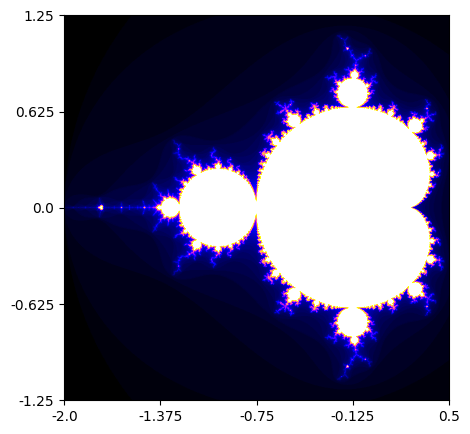

In [13]:
start = time.time()
z = mandelbrot_set3(xmin, xmax, ymin, ymax, img_width, img_height, iters)
dt = time.time() - start

print ("Mandelbrot created on GPU in %f s" % dt)

plt.figure(figsize=(5,5))
plt.imshow(z, cmap = 'gnuplot2')

plt.xticks(np.linspace(0, 1000, 5), np.linspace(xmin, xmax, 5))
plt.yticks(np.linspace(0, 1000, 5), np.linspace(ymax, ymin, 5))

plt.show()